In [20]:
import pandas as pd
import numpy as np

In [21]:
df=pd.read_csv("C:/Users/Anushka/Desktop/datascience/project/spam.csv",encoding="latin-1")

In [22]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1488,ham,Tell them no need to investigate about me anyw...,NaN,NaN,NaN
5162,ham,Just send a text. We'll skype later.,NaN,NaN,NaN
1585,ham,I was wondering if it would be okay for you to...,NaN,NaN,NaN
4949,ham,Hi its me you are probably having too much fun...,NaN,NaN,NaN
2247,spam,Back 2 work 2morro half term over! Can U C me ...,NaN,NaN,NaN


In [23]:
df.shape

(5572, 5)

#DATA CLEANING


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [25]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [26]:
df.sample(4)

,v1,v2
5025,spam,Ur cash-balance is currently 500 pounds - to m...
1450,ham,Msg me when rajini comes.
4038,ham,I cant pick the phone right now. Pls send a me...
3724,ham,Nothing spl..wat abt u and whr ru?


In [27]:
#renaming as v1 and v2 are nt that understnadeble
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(5)


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [29]:
df['target']=encoder.fit_transform(df['target'])

In [30]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [32]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(403)

In [34]:
df=df.drop_duplicates(keep='first')

In [35]:
df


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [36]:
df.duplicated().sum()


np.int64(0)

In [37]:
df.shape

(5169, 2)

#EDA

In [38]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [39]:
import matplotlib.pyplot as plt

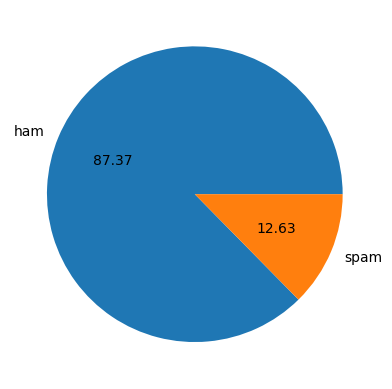

In [40]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [41]:
import nltk


In [42]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anushka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Anushka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
df['num_chracters']=df['text'].apply(len)


In [44]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [45]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [46]:
df.head()

,target,text,num_chracters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [47]:
df[df['target']==0][['num_chracters','num_words','num_sentences']].describe()

,num_chracters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
df[df['target']==1][['num_chracters','num_words','num_sentences']].describe()

,num_chracters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [49]:
import seaborn as sns

<Axes: xlabel='num_chracters', ylabel='Count'>

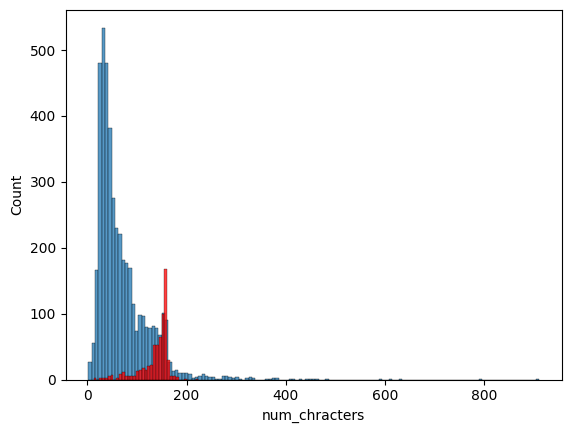

In [50]:
sns.histplot(df[df['target']==0]['num_chracters'])
sns.histplot(df[df['target']==1]['num_chracters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

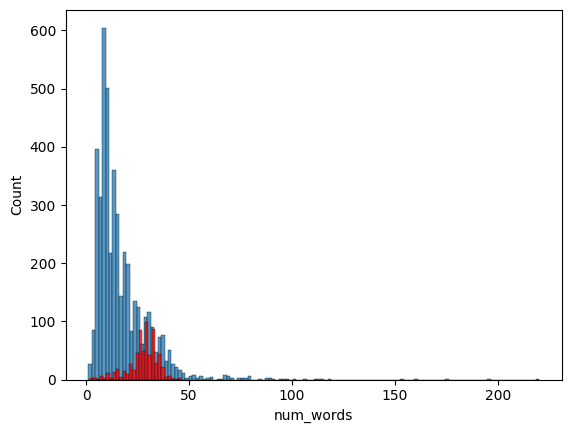

In [51]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

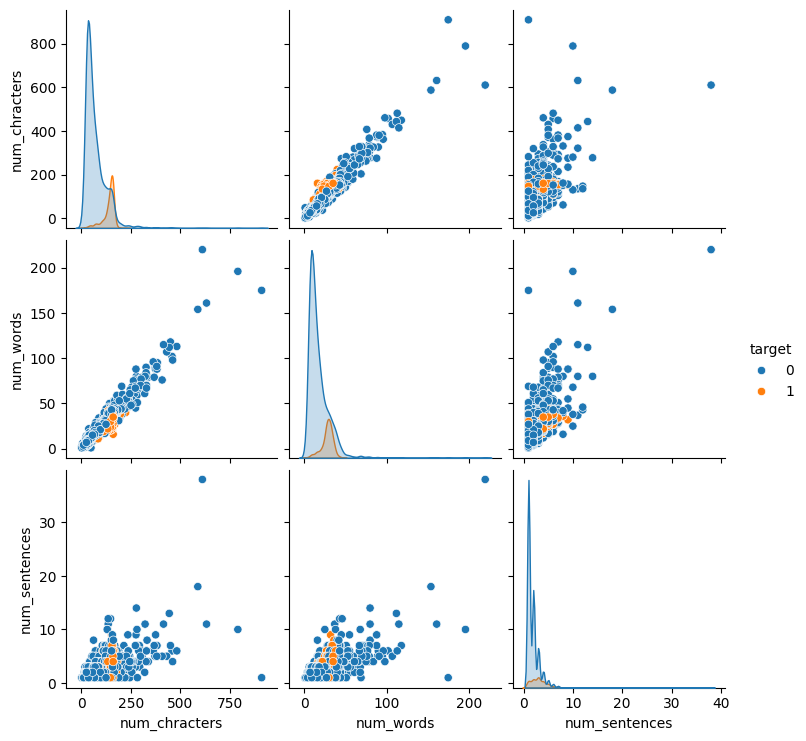

In [52]:
sns.pairplot(df,hue='target')

<Axes: >

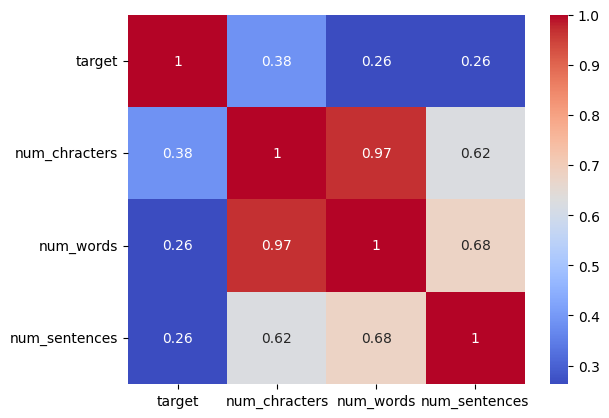

In [53]:
sns.heatmap(df[['target',
                'num_chracters','num_words','num_sentences']].corr(),annot=True,cmap='coolwarm')

  #data prerprocsessing
  

In [54]:
nltk.download ('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transfrom_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text :
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anushka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
transfrom_text("anushka is like  a good gal? and she loves dancing,painting")

'anushka like good gal love danc paint'

In [56]:
new_df=df[['target','text','num_chracters']]

In [57]:
new_df['text']=new_df['text'].apply(transfrom_text)

C:\Users\Anushka\AppData\Local\Temp\ipykernel_18048\2412328046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text']=new_df['text'].apply(transfrom_text)


In [58]:
new_df

,target,text,num_chracters
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah think goe usf live around though,61
...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,161
5568,0,b go esplanad fr home,37
5569,0,piti mood suggest,57
5570,0,guy bitch act like interest buy someth els nex...,125


In [59]:
!pip install wordcloud matplotlib nltk
from wordcloud import WordCloud
wc=WordCloud(width =500,height=505,min_font_size=10,background_color='white')


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
spam_wc=wc.generate(df[df['target']==1]['text'].str.cat(sep=' '))

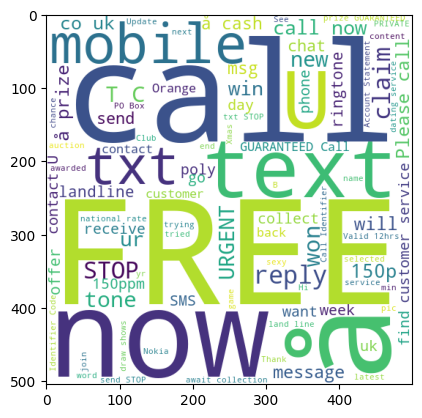

In [61]:
plt.imshow(spam_wc)

In [62]:
ham_wc=wc.generate(df[df['target']==0]['text'].str.cat(sep=' '))

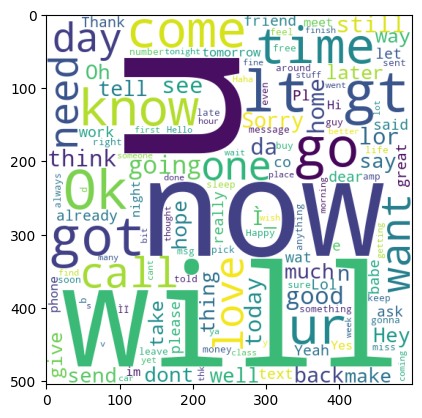

In [63]:
plt.imshow(ham_wc)

In [64]:
new_df

,target,text,num_chracters
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah think goe usf live around though,61
...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,161
5568,0,b go esplanad fr home,37
5569,0,piti mood suggest,57
5570,0,guy bitch act like interest buy someth els nex...,125


In [65]:
spam_corpus=[]
for msg in new_df[new_df["target"]==1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [66]:
len(spam_corpus)

9939

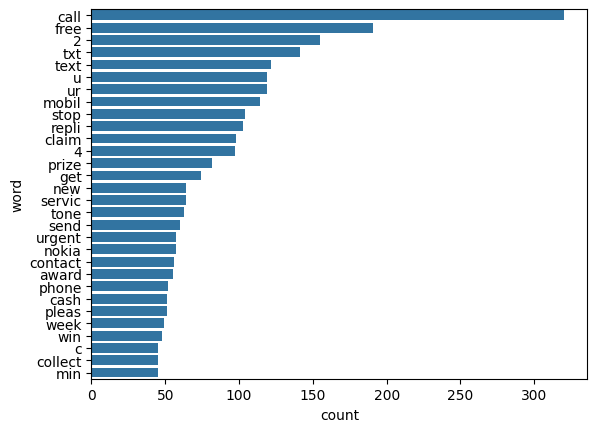

In [67]:
from collections import Counter 
sns.barplot(x='count',y='word',data=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','count']))
plt.show()

In [68]:
ham_corpus=[]
for msg in new_df[new_df["target"]==0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [69]:
len(ham_corpus)

35404

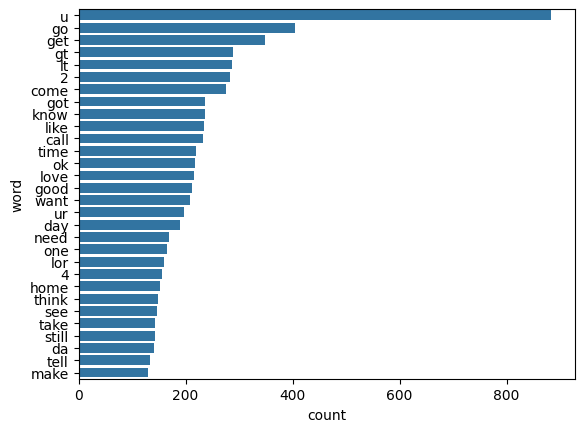

In [70]:
from collections import Counter 
sns.barplot(x='count',y='word',data=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','count']))
plt.show()

#MODEL BUILDING

In [71]:
#text convertion to numbers
#vectorize
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [72]:
X=cv.fit_transform(df["text"]).toarray()

In [73]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 8672))

In [74]:
y=df['target'].values

In [75]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [76]:
new_df

,target,text,num_chracters
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah think goe usf live around though,61
...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,161
5568,0,b go esplanad fr home,37
5569,0,piti mood suggest,57
5570,0,guy bitch act like interest buy someth els nex...,125


In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)



In [78]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [79]:
# Create model objects
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



In [80]:
# Train MultinomialNB
mnb.fit(X_train, y_train)

# Predict
y_pred = mnb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))



Accuracy: 0.97678916827853
Confusion Matrix:
 [[878  18]
 [  6 132]]
Precision: 0.88


In [81]:
# Train MultinomialNB
gnb.fit(X_train, y_train)

# Predict
y_pred1 = gnb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))


Accuracy: 0.9148936170212766
Confusion Matrix:
 [[824  72]
 [ 16 122]]
Precision: 0.6288659793814433


In [82]:
bnb.fit(X_train, y_train)

# Predict
y_pred2 = bnb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

Accuracy: 0.9777562862669246
Confusion Matrix:
 [[893   3]
 [ 20 118]]
Precision: 0.9752066115702479


In [83]:
#trying another vectorization method[TFIDF]
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer()

In [84]:
x=tfidf.fit_transform(df["text"]).toarray()

In [85]:
x.shape

(5169, 8672)

In [86]:
y2=df['target'].values

In [87]:
y2

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.2,random_state=2)



In [89]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [90]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [91]:
mnb.fit(x_train, y2_train)

# Predict
y2_pred = mnb.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred))
print("Precision:", precision_score(y2_test, y2_pred))


Accuracy: 0.9506769825918762
Confusion Matrix:
 [[896   0]
 [ 51  87]]
Precision: 1.0


In [92]:
gnb.fit(x_train, y2_train)

# Predict
y2_pred = gnb.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred))
print("Precision:", precision_score(y2_test, y2_pred))

Accuracy: 0.9110251450676983
Confusion Matrix:
 [[823  73]
 [ 19 119]]
Precision: 0.6197916666666666


In [93]:
bnb.fit(x_train, y2_train)

# Predict
y2_pred = bnb.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred))
print("Precision:", precision_score(y2_test, y2_pred))

Accuracy: 0.9777562862669246
Confusion Matrix:
 [[893   3]
 [ 20 118]]
Precision: 0.9752066115702479


In [94]:
#tfidf with mnd best
#precision matter more here

In [95]:
!pip install xgboost


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
!pip install xgboost


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [98]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [99]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision


In [100]:
train_classifier(svc, X_train, y_train, X_test, y_test)


(0.8462282398452611, 0.4117647058823529)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


In [ ]:
import pandas as pd

performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores 
})
